### Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

#Import PCA
from sklearn.decomposition import PCA
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Importing SVM
from sklearn.svm import SVC

# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

#Importing RandomForest
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

### Data Understanding

In [ ]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [ ]:
df_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [ ]:
df.shape

(69999, 172)

In [ ]:
df_test.shape

(30000, 171)

In [ ]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

### Handling Missing Values

In [ ]:
# checking null value percentage in columns in train data

round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

arpu_3g_6                   74.90
count_rech_2g_6             74.90
night_pck_user_6            74.90
arpu_2g_6                   74.90
date_of_last_rech_data_6    74.90
total_rech_data_6           74.90
av_rech_amt_data_6          74.90
max_rech_data_6             74.90
count_rech_3g_6             74.90
fb_user_6                   74.90
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
total_rech_data_7           74.48
max_rech_data_7             74.48
fb_user_7                   74.48
count_rech_2g_7             74.48
count_rech_3g_7             74.48
arpu_3g_7                   74.48
av_rech_amt_data_7          74.48
arpu_2g_7                   74.48
count_rech_2g_8             73.69
av_rech_amt_data_8          73.69
night_pck_user_8            73.69
max_rech_data_8             73.69
total_rech_data_8           73.69
arpu_2g_8                   73.69
arpu_3g_8                   73.69
date_of_last_rech_data_8    73.69
fb_user_8                   73.69
count_rech_3g_

In [ ]:
# checking null value percentage in columns in test data

round(df_test.isnull().sum()/len(df_test.index)*100,2).sort_values(ascending=False)

arpu_3g_6                   74.72
count_rech_3g_6             74.72
fb_user_6                   74.72
night_pck_user_6            74.72
total_rech_data_6           74.72
max_rech_data_6             74.72
count_rech_2g_6             74.72
date_of_last_rech_data_6    74.72
av_rech_amt_data_6          74.72
arpu_2g_6                   74.72
night_pck_user_7            74.31
arpu_2g_7                   74.31
fb_user_7                   74.31
arpu_3g_7                   74.31
count_rech_2g_7             74.31
av_rech_amt_data_7          74.31
max_rech_data_7             74.31
count_rech_3g_7             74.31
total_rech_data_7           74.31
date_of_last_rech_data_7    74.31
night_pck_user_8            73.59
arpu_3g_8                   73.59
arpu_2g_8                   73.59
count_rech_3g_8             73.59
total_rech_data_8           73.59
av_rech_amt_data_8          73.59
max_rech_data_8             73.59
fb_user_8                   73.59
count_rech_2g_8             73.59
date_of_last_r

In [ ]:
#imputing zero in the recharge month variable which means customer didnot recharge that month

recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

In [ ]:
df[recharge_cols]=df[recharge_cols].apply(lambda x:x.fillna(0))
df_test[recharge_cols]=df_test[recharge_cols].apply(lambda x:x.fillna(0))

In [ ]:
#verify if the missing values are correctly imputed in train
round(df[recharge_cols].isnull().sum()/len(df[recharge_cols].index)*100,2).sort_values(ascending=False)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [ ]:
#verify if the missing values are correctly imputed in test
round(df_test[recharge_cols].isnull().sum()/len(df_test[recharge_cols].index)*100,2).sort_values(ascending=False)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [ ]:
#below columns have binary values 1 and 0 hence can be considered categorical
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]

In [ ]:
#imputing the missing values in categorical cols with a constant value in train
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

#imputing the missing values in categorical cols with a constant value in test
df_test[cat_cols] = df_test[cat_cols].apply(lambda x: x.fillna(-1))

In [ ]:
#verify if the missing values are correctly imputed
round(df[cat_cols].isnull().sum()/len(df[cat_cols].index)*100,2).sort_values(ascending=False)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [ ]:
#verify if the missing values are correctly imputed in test
round(df_test[cat_cols].isnull().sum()/len(df_test[cat_cols].index)*100,2).sort_values(ascending=False)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [ ]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_2g_6,74.90
count_rech_3g_6,74.90
arpu_3g_6,74.90
count_rech_2g_6,74.90
date_of_last_rech_data_6,74.90
count_rech_2g_7,74.48
count_rech_3g_7,74.48
arpu_2g_7,74.48
date_of_last_rech_data_7,74.48
arpu_3g_7,74.48


In [ ]:
#dropping the columns which have more than 70 percent of missing values
cols_missing_values = list(df_missing_columns.index[df_missing_columns['null'] > 70])
cols_missing_values

['arpu_2g_6',
 'count_rech_3g_6',
 'arpu_3g_6',
 'count_rech_2g_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_2g_7',
 'date_of_last_rech_data_7',
 'arpu_3g_7',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8']

In [ ]:
df.drop(cols_missing_values, axis=1, inplace=True)

In [ ]:
df.shape

(69999, 157)

In [ ]:
df_test.drop(cols_missing_values, axis=1, inplace=True)

In [ ]:
df_test.shape

(30000, 156)

Dropping the date columns as they will not be useful in the analysis

In [ ]:
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [ ]:
df.drop(date_cols, axis=1, inplace=True)
df_test.drop(date_cols, axis=1, inplace=True)

In [ ]:
#dropping id columns as it is not required in analysis
id_cols =["circle_id","id"]
churn_id = df_test.id
df.drop(id_cols, axis=1, inplace=True)
df_test.drop(id_cols, axis=1, inplace=True)

In [ ]:
df.shape

(69999, 149)

In [ ]:
df_test.shape

(30000, 148)

In [ ]:
columns_with_missing_values = df.columns[df.isna().sum() >0]
print(columns_with_missing_values)
data_types_of_selected_columns = df[columns_with_missing_values].dtypes
print(data_types_of_selected_columns)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [ ]:
#imputing with median for all the missing values in numerical column in train
df[columns_with_missing_values] = df[columns_with_missing_values].apply(lambda x: x.fillna(x.median()))

#imputing with median for all the missing values in numerical column in test
df_test[columns_with_missing_values] = df_test[columns_with_missing_values].apply(lambda x: x.fillna(x.median()))

In [ ]:
#checking if all missing values are imputed in train
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

loc_og_t2o_mou        0.0
isd_ic_mou_7          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
isd_ic_mou_8          0.0
isd_ic_mou_6          0.0
std_ic_t2m_mou_6      0.0
spl_ic_mou_8          0.0
std_ic_t2m_mou_8      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2o_mou_6      0.0
std_ic_t2o_mou_7      0.0
std_ic_t2o_mou_8      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
spl_ic_mou_6          0.0
spl_ic_mou_7          0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_d

In [ ]:
#checking if all missing values are imputed in test
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

loc_og_t2o_mou        0.0
isd_ic_mou_7          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
isd_ic_mou_8          0.0
isd_ic_mou_6          0.0
std_ic_t2m_mou_6      0.0
spl_ic_mou_8          0.0
std_ic_t2m_mou_8      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2o_mou_6      0.0
std_ic_t2o_mou_7      0.0
std_ic_t2o_mou_8      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
spl_ic_mou_6          0.0
spl_ic_mou_7          0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_d

In [ ]:
singlevaluecols = df.columns[df.nunique()==1]
singlevaluecols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [ ]:
#df.drop(singlevaluecols, axis=1, inplace=True)
df.shape

(69999, 149)

In [ ]:
df_test.shape

(30000, 148)

### Finding high value customers

In [ ]:
# calculate the total data recharge amount for June and July: number of recharges * average recharge amount FOR TRAIN SET
df['total_data_rech_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_data_rech_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

# calculate the total data recharge amount for June and July: number of recharges * average recharge amount FOR TEST SET
df_test['total_data_rech_6'] = df_test['total_rech_data_6'] * df_test['av_rech_amt_data_6']
df_test['total_data_rech_7'] = df_test['total_rech_data_7'] * df_test['av_rech_amt_data_7']

In [ ]:
# calculate total recharge amount for June and July: call recharge amount + data recharge amount FOR TRAIN SET
df['amt_data_6'] = df['total_rech_amt_6'] + df['total_data_rech_6']
df['amt_data_7'] = df['total_rech_amt_7'] + df['total_data_rech_7']

# calculate total recharge amount for June and July: call recharge amount + data recharge amount FOR TEST SET
df_test['amt_data_6'] = df_test['total_rech_amt_6'] + df_test['total_data_rech_6']
df_test['amt_data_7'] = df_test['total_rech_amt_7'] + df_test['total_data_rech_7']

In [ ]:
df['av_amt_data_6_7'] = (df['amt_data_6'] + df['amt_data_7'])/2

df_test['av_amt_data_6_7'] = (df_test['amt_data_6'] + df_test['amt_data_7'])/2

In [ ]:
print("Recharge amount 70th percentile train set: {0}".format(df['av_amt_data_6_7'].quantile(0.7)))

print("Recharge amount 70th percentile test set: {0}".format(df_test['av_amt_data_6_7'].quantile(0.7)))

Recharge amount 70th percentile train set: 477.5
Recharge amount 70th percentile test set: 478.0


In [ ]:
churn_filtered = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)

In [ ]:
#churn_filtered = df

In [ ]:
churn_filtered.shape

(21013, 154)

0    27.534679
1     2.484321
Name: churn_probability, dtype: float64


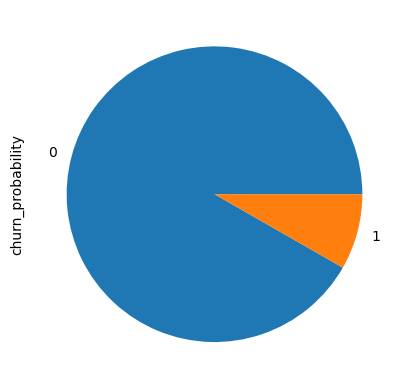

In [ ]:
# lets find out churn/non churn percentage
print((churn_filtered['churn_probability'].value_counts()/len(df))*100)
((churn_filtered['churn_probability'].value_counts()/len(df))*100).plot(kind="pie")
plt.show()

In [ ]:
#Columns derived during the earlier 'good' phase can be excluded during their creation for a more refined dataset in train set.

churn_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

#Columns derived during the earlier 'good' phase can be excluded during their creation for a more refined dataset in test set.

df_test.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [ ]:
columns = []
for i in churn_filtered.columns:
    if churn_filtered[i].nunique() ==1:
        columns.append(i)
print(f'Dropped Columns : {columns}')
churn_filtered = churn_filtered.drop(columns,axis=1)
df_test = df_test.drop(columns,axis=1)

Dropped Columns : ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [ ]:
churn_filtered.shape

(21013, 139)

In [ ]:
# # Dropping cols with Low Variance
# cols = []
# for col in churn_filtered.columns:
#     val = churn_filtered[col].value_counts(normalize=True)
#     if val.values[0]*100 >= 75:
#         if(col != 'churn_probability'):
#             cols.append(col)

# print(cols)

In [ ]:
# churn_filtered = churn_filtered.drop(cols, axis=1)

# df_test = df_test.drop(cols, axis=1)

In [ ]:
churn_filtered.shape

(21013, 139)

In [ ]:
churn_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13,10,8,122,50,41,30,25,10,30,6.0,25.0,41.0,25.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,1225.0,1337.0,1515.0,1473.0,1494.0
1,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5,3,4,652,250,250,250,0,150,250,1.0,154.0,0.0,154.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,0.0,-1.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,-1.0,1.0,602,0.0,0.00,0.00,0,154.0,0.0,808.0,400.0,604.0
2,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.0,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,26,19,10,494,110,110,144,110,50,30,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,455,0.0,0.00,0.00,0,0.0,0.0

In [ ]:
churn_filtered.nunique()

arpu_6                20467
arpu_7                20475
arpu_8                19789
onnet_mou_6           13090
onnet_mou_7           13127
onnet_mou_8           12317
offnet_mou_6          16101
offnet_mou_7          16137
offnet_mou_8          15343
roam_ic_mou_6          3136
roam_ic_mou_7          2618
roam_ic_mou_8          2600
roam_og_mou_6          3561
roam_og_mou_7          2968
roam_og_mou_8          3004
loc_og_t2t_mou_6       8511
loc_og_t2t_mou_7       8478
loc_og_t2t_mou_8       8185
loc_og_t2m_mou_6      12402
loc_og_t2m_mou_7      12370
loc_og_t2m_mou_8      11985
loc_og_t2f_mou_6       2609
loc_og_t2f_mou_7       2622
loc_og_t2f_mou_8       2526
loc_og_t2c_mou_6       1434
loc_og_t2c_mou_7       1480
loc_og_t2c_mou_8       1451
loc_og_mou_6          14182
loc_og_mou_7          14204
loc_og_mou_8          13532
std_og_t2t_mou_6       8393
std_og_t2t_mou_7       8473
std_og_t2t_mou_8       7754
std_og_t2m_mou_6       9915
std_og_t2m_mou_7       9886
std_og_t2m_mou_8    

In [ ]:
df_test.shape

(30000, 138)

In [ ]:
df_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1692,0.00,0.00,0.00,0.0,0.0,103.0,90.0,96.5
1,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,2533,0.00,0.00,0.00,0.0,0.0,500.0,500.0,500.0
2,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,1000,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,277,525.61,758.41,241.84,0.0,0.0,500.0,1000.0,750.0
3,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01

In [ ]:
df_test.nunique()

arpu_6                27493
arpu_7                27406
arpu_8                26871
onnet_mou_6           12283
onnet_mou_7           12177
onnet_mou_8           12054
offnet_mou_6          16382
offnet_mou_7          16152
offnet_mou_8          16005
roam_ic_mou_6          3072
roam_ic_mou_7          2489
roam_ic_mou_8          2523
roam_og_mou_6          3661
roam_og_mou_7          3014
roam_og_mou_8          2933
loc_og_t2t_mou_6       7707
loc_og_t2t_mou_7       7639
loc_og_t2t_mou_8       7512
loc_og_t2m_mou_6      11835
loc_og_t2m_mou_7      11762
loc_og_t2m_mou_8      11600
loc_og_t2f_mou_6       2325
loc_og_t2f_mou_7       2359
loc_og_t2f_mou_8       2302
loc_og_t2c_mou_6       1403
loc_og_t2c_mou_7       1540
loc_og_t2c_mou_8       1557
loc_og_mou_6          14285
loc_og_mou_7          14154
loc_og_mou_8          13999
std_og_t2t_mou_6       7973
std_og_t2t_mou_7       8097
std_og_t2t_mou_8       7906
std_og_t2m_mou_6       9123
std_og_t2m_mou_7       9225
std_og_t2m_mou_8    

In [ ]:
y = churn_filtered.pop('churn_probability')
X = churn_filtered

In [ ]:
X.shape , y.shape

((21013, 138), (21013,))

## Dealing with data imbalance

In [ ]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [ ]:
# Fittign SMOTE to the train set
X_smote, y_smote = sm.fit_resample(X,y)

In [ ]:
y_smote.shape

(38548,)

In [ ]:
X_smote.shape

(38548, 138)

## Train Test split for Train data set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=0.75 ,test_size = 0.25, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28911, 138)
(28911,)
(9637, 138)
(9637,)


## Feature Scaling

In [ ]:

# Standardization method
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Instantiate the Scaler
scaler = StandardScaler()

In [ ]:
# Fit the data into scaler and transform

# List of the numeric columns
cols_scale = X_train.columns.to_list()

X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [ ]:
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
count,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04,2.891100e+04
mean,1.214099e-16,-1.477072e-16,-9.271635e-17,-7.373070e-18,2.457690e-17,6.635763e-18,-4.620457e-17,7.864608e-18,1.093672e-17,4.386977e-17,-2.273363e-17,-6.045917e-17,-3.711112e-17,-3.563650e-17,3.440766e-17,4.522

In [ ]:
X_test[cols_scale] = scaler.transform(X_test[cols_scale])

In [ ]:
df_test[cols_scale] =  scaler.transform(df_test[cols_scale])

In [ ]:
df_test.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.613556,-0.529747,-0.196883,-0.349164,-0.301964,-0.141144,-0.414189,-0.347844,-0.155558,-0.104837,-0.119239,-0.112218,-0.155067,-0.178861,-0.150347,-0.115751,-0.092424,-0.034739,-0.208403,-0.164552,-0.05305

## Model with PCA


In [ ]:
# Instantiate PCA
pca = PCA(random_state=42)

In [ ]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [ ]:
# Principal components
pca.components_

array([[-6.12274283e-02, -5.03085897e-02, -1.10526612e-02, ...,
         8.77590473e-02,  1.01627059e-01,  1.12754717e-01],
       [ 9.95255637e-02,  1.44369255e-01,  1.71863674e-01, ...,
         3.36913212e-02,  6.13030426e-02,  5.69180342e-02],
       [ 9.45273537e-02,  1.56943258e-01,  1.58509794e-01, ...,
         1.45204130e-01,  1.87924510e-01,  1.98655191e-01],
       ...,
       [-3.60241332e-07, -2.73342050e-07, -1.84039692e-07, ...,
         6.62511965e-07,  1.58446116e-07,  4.78903131e-07],
       [-2.10680926e-07, -1.72259961e-07,  2.09050396e-07, ...,
         6.96403918e-07, -2.89044829e-07,  2.24769662e-07],
       [-0.00000000e+00, -3.50766191e-16, -1.08071491e-15, ...,
        -4.41388080e-01, -4.68166669e-01,  7.65504104e-01]])

In [ ]:
var_ratio = np.round((pca.explained_variance_ratio_) * 100,2)
var_ratio

var_cum = np.cumsum(var_ratio)
var_cum

array([  9.98,  19.65,  25.74,  30.25,  34.17,  37.51,  40.54,  43.48,
        45.92,  48.25,  50.51,  52.69,  54.68,  56.58,  58.33,  59.99,
        61.54,  62.96,  64.33,  65.62,  66.89,  68.1 ,  69.3 ,  70.41,
        71.49,  72.5 ,  73.46,  74.38,  75.27,  76.13,  76.97,  77.75,
        78.51,  79.24,  79.95,  80.64,  81.32,  81.98,  82.63,  83.27,
        83.89,  84.49,  85.07,  85.62,  86.17,  86.7 ,  87.21,  87.67,
        88.1 ,  88.52,  88.92,  89.31,  89.7 ,  90.08,  90.45,  90.81,
        91.16,  91.5 ,  91.83,  92.15,  92.46,  92.77,  93.07,  93.36,
        93.65,  93.93,  94.2 ,  94.46,  94.71,  94.95,  95.19,  95.42,
        95.64,  95.86,  96.07,  96.28,  96.48,  96.68,  96.87,  97.06,
        97.24,  97.42,  97.59,  97.75,  97.91,  98.06,  98.21,  98.36,
        98.5 ,  98.63,  98.75,  98.87,  98.98,  99.09,  99.19,  99.29,
        99.38,  99.46,  99.54,  99.62,  99.69,  99.75,  99.81,  99.85,
        99.89,  99.93,  99.96,  99.98, 100.  , 100.01, 100.02, 100.03,
      

Text(0, 0.5, 'Cumulative Variance')

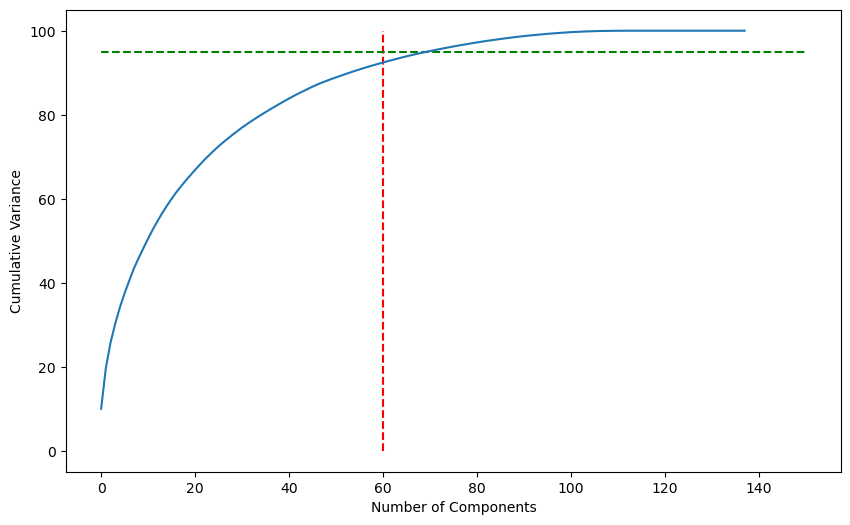

In [ ]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.vlines(x=60, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=95, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')


We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

## Performing PCA with 60 components


In [ ]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [ ]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [ ]:
# Fit and transform the X_test
X_test_pca = pca_final.transform(X_test)


In [ ]:
df_test_pca = pca_final.transform(df_test)

## Logistic regression

In [ ]:
base_Log_reg = LogisticRegression()

In [ ]:
base_Log_reg.fit(X_train_pca, y_train)

LogisticRegression()

In [ ]:
y_train_pred = base_Log_reg.predict(X_train_pca)
y_train_probs = base_Log_reg.predict_proba(X_train_pca)[:,1]

confusion=confusion_matrix(y_train, y_train_pred)
print('Confusion matrix:\n', confusion)

print(f'Accuracy Score : {metrics.accuracy_score(y_train, y_train_pred)*100}')
print(f'ROC_AUC : {metrics.roc_auc_score(y_train, y_train_probs)*100}')
print(f'F1 Score : {metrics.f1_score(y_train, y_train_pred)*100}')
print(f'Recall : {metrics.recall_score(y_train, y_train_pred)*100}')
print(f'Precision : {metrics.precision_score(y_train, y_train_pred)*100}')

Confusion matrix:
 [[11729  2663]
 [ 1928 12591]]
Accuracy Score : 84.12023105392412
ROC_AUC : 91.33650072142916
F1 Score : 84.57998858025728
Recall : 86.72084854328811
Precision : 82.5422839910843


In [ ]:
# Predictions on the train set
y_test_pred = base_Log_reg.predict(X_test_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3986  896]
 [ 590 4165]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8458026356750026
Sensitivity:- 0.8759200841219769
Specificity:- 0.816468660385088


## Logistic regression with PCA


In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'recall',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.077752,0.011391,0.002202,0.000813,0.01,{'C': 0.01},0.866944,0.860698,0.868975,0.867905,0.865604,0.866025,0.002886,6,0.868220,0.869087,0.864685,0.866259,0.867950,0.867240,0.001573
1,0.097603,0.010335,0.003110,0.001025,0.1,{'C': 0.1},0.866944,0.862427,0.871690,0.870313,0.866990,0.867673,0.003214,3,0.868392,0.869345,0.864944,0.867120,0.867521,0.867464,0.001474
2,0.108536,0.011400,0.002309,0.001214,1,{'C': 1},0.865558,0.862772,0.872369,0.869969,0.868029,0.867740,0.003344,1,0.868564,0.869517,0.865117,0.867292,0.867263,0.867550,0.001481
3,0.118504,0.012167,0.003069,0.000668,10,{'C': 10},0.865558,0.862772,0.872369,0.869969,0.868029,0.867740,0.003344,1,0.868564,0.869517,0.865031,0.867292,0.867177,0.867516,0.001513
4,0.118760,0.016076,0.003666,0.001515,100,{'C': 100},0.865558,0.862772,0.872369,0.869625,0.868029,0.867671,0.003301,4,0.868564,0.869603,0.865031,0.867292,0.867177,0.867533,0.001536
5,0.107709,0.005602,0.002889,0.001536,1000,{'C': 1000},0.865558,0.862772,0.872369,0.869625,0.868029,0.867671,0.003301,4,0.868564,0.869603,0.865031,0.867292,0.867177,0.867533,0.001536


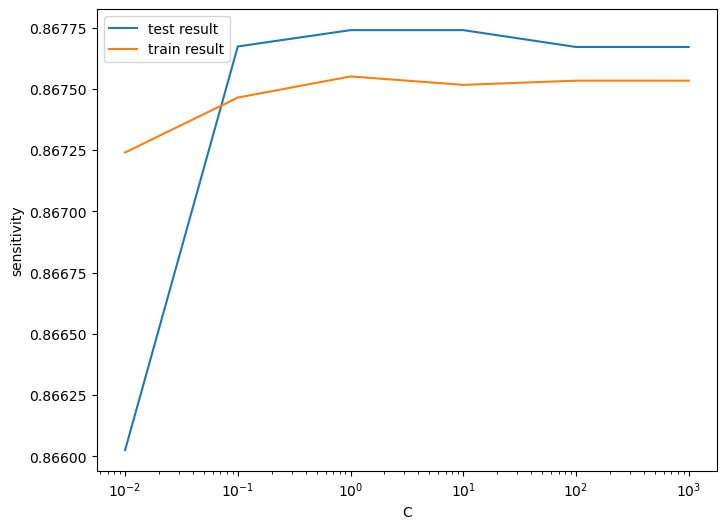

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.867739504971443 at C = 1


In [ ]:
log_reg = LogisticRegression(C=best_C)

### Prediction on train set

In [ ]:
log_reg.fit(X_train_pca, y_train)

LogisticRegression(C=1)

In [ ]:
y_train_pred = log_reg.predict(X_train_pca)


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[11729  2663]
 [ 1928 12591]]


In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8412023105392411
Sensitivity:- 0.9474237644584648
Specificity:- 0.9270790659565752


### Prediction on test set

In [ ]:
y_test_pred = log_reg.predict(X_test_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3986  896]
 [ 590 4165]]


In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8458026356750026
Sensitivity:- 0.9474237644584648
Specificity:- 0.9270790659565752


In [ ]:
y_df_test_pred1 = log_reg.predict(df_test_pca)

In [ ]:
final_prediction = pd.DataFrame({'id':churn_id,'churn_probability':y_df_test_pred1})

In [ ]:
final_prediction.to_csv('submission.csv',index=False)

## Decision Tree with PCA

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'recall',
                           cv = 5,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.704202,0.014855,0.001997,0.001356,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.842975,0.807785,0.851584,0.785813,0.808884,0.819408,0.024352,3
1,0.712278,0.019582,0.002907,0.002098,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.842975,0.807785,0.851584,0.785813,0.808884,0.819408,0.024352,3
2,0.714690,0.015113,0.004575,0.002030,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.830923,0.802274,0.844697,0.778926,0.803719,0.812108,0.023170,5
3,0.712733,0.006045,0.002560,0.001521,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.830923,0.802274,0.844697,0.778926,0.803719,0.812108,0.023170,5
4,1.149811,0.010626,0.003568,0.001325,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.838499,0.860145,0.831267,0.815427,0.848485,0.838764,0.015182,1
5,1.156883,0.037763,0.004324,0.001999,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.838499,0.860145,0.831267,0.813705,0.848485,0.838420,0.015718,2
6,1.067308,0.020626,0.003847,0.001866,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.801653,0.828453,0.814050,0.795110,0.806818,0.809217,0.011449,7
7,1.072175,0.025496,0.004074,0.001716,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.801653,0.828453,0.814050,0.795110,0.806818,0.809217,0.011449,7


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best Recall:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best Recall:- 0.8387644727739614
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

### Predictions on train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[12061  2331]
 [ 1708 12811]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.860295389298191
Sensitivity:- 0.882361044149046
Specificity:- 0.8380350194552529


### Predictions on the test set

In [ ]:
y_test_pred = dt_pca_model.predict(X_test_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4009  873]
 [ 698 4057]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8369824634222268
Sensitivity:- 0.8532071503680336
Specificity:- 0.8211798443260958


In [ ]:
#y_df_test_pred1 = dt_pca_model.predict(df_test_pca)

In [ ]:
#final_prediction = pd.DataFrame({'id':churn_id,'churn_probability':y_df_test_pred})

In [ ]:
#final_prediction.to_csv('submission.csv',index=False)

## RandomForest with PCA

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300],
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)

# Fit the model
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [ ]:
# %%time
# grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
CPU times: total: 2min 55s
Wall time: 9h 6min 26s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'max_features': [10, 20],
                         'min_samples_leaf': [5, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8268133236484383 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [ ]:
#Model with Optimal parameters

# model with the best hyperparameters
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50,
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

In [ ]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

### Predictions on train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[12011  2381]
 [ 2467 12052]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_train, y_train_pred)*100)

# Sensitivity
print("Sensitivity: ",TP / float(TP+FN)*100)

# Specificity
print("Specificity: ", TN / float(TN+FP)*100)

Accuracy:  83.23129604648749
Sensitivity:  83.00847165782767
Specificity:  83.45608671484158


### Prediction on test set

In [ ]:
y_test_pred = rfc_model.predict(X_test_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4064  818]
 [ 811 3944]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred)*100)

# Sensitivity
print("Sensitivity: ",TP / float(TP+FN)*100)

# Specificity
print("Specificity: ", TN / float(TN+FP)*100)

Accuracy:  83.09639929438623
Sensitivity:  82.94426919032597
Specificity:  83.24457189676362


In [ ]:
y_df_test_pred = rfc_model.predict(df_test_pca)

In [ ]:
final_prediction = pd.DataFrame({'id':churn_id,'churn_probability':y_df_test_pred})

In [ ]:
df_test.shape

(30000, 138)

In [ ]:
final_prediction.to_csv('submission.csv',index=False)

### SVM using PCA

In [ ]:
from sklearn.svm import SVC

In [ ]:
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring= 'accuracy',
                        cv = 3,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.361492,0.428543,5.477968,0.118088,1,0.01,"{'C': 1, 'gamma': 0.01}",0.907336,0.907648,0.909827,0.908270,0.001108,5,0.921241,0.920515,0.922279,0.921345,0.000724
1,8.469323,0.053009,5.887234,0.042912,1,0.001,"{'C': 1, 'gamma': 0.001}",0.856179,0.854727,0.860226,0.857044,0.002327,10,0.859655,0.861160,0.856958,0.859258,0.001739
2,10.599964,0.093534,7.516136,0.067152,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.832209,0.837709,0.834907,0.834942,0.002245,12,0.836049,0.834492,0.835167,0.835236,0.000637
3,8.054265,0.156829,3.897344,0.009846,10,0.01,"{'C': 10, 'gamma': 0.01}",0.940230,0.937014,0.935042,0.937429,0.002138,3,0.960569,0.961762,0.962021,0.961451,0.000633
4,8.136731,0.045386,5.109668,0.004234,10,0.001,"{'C': 10, 'gamma': 0.001}",0.878178,0.877555,0.881913,0.879216,0.001925,7,0.886687,0.885182,0.884819,0.885563,0.000809
5,9.381521,0.567093,6.685887,0.282255,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.848916,0.846321,0.847255,0.847497,0.001073,11,0.848397,0.850213,0.847826,0.848812,0.001018
6,13.410569,0.951684,2.982774,0.065859,100,0.01,"{'C': 100, 'gamma': 0.01}",0.945211,0.948947,0.943136,0.945765,0.002404,1,0.987289,0.987237,0.988274,0.987600,0.000477
7,10.647432,0.017007,4.376591,0.039072,100,0.001,"{'C': 100, 'gamma': 0.001}",0.903808,0.902874,0.907129,0.904604,0.001826,6,0.918284,0.918854,0.919996,0.919045,0.000712
8,8.935532,0.200442,5.512337,0.039820,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.857113,0.856076,0.860226,0.857805,0.001764,9,0.861212,0.862405,0.859240,0.860953,0.001305
9,18.062641,0.566342,2.532394,0.028332,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.941268,0.940334,0.937740,0.939781,0.001493,2,0.998288,0.997873,0.998807,0.998322,0.000382


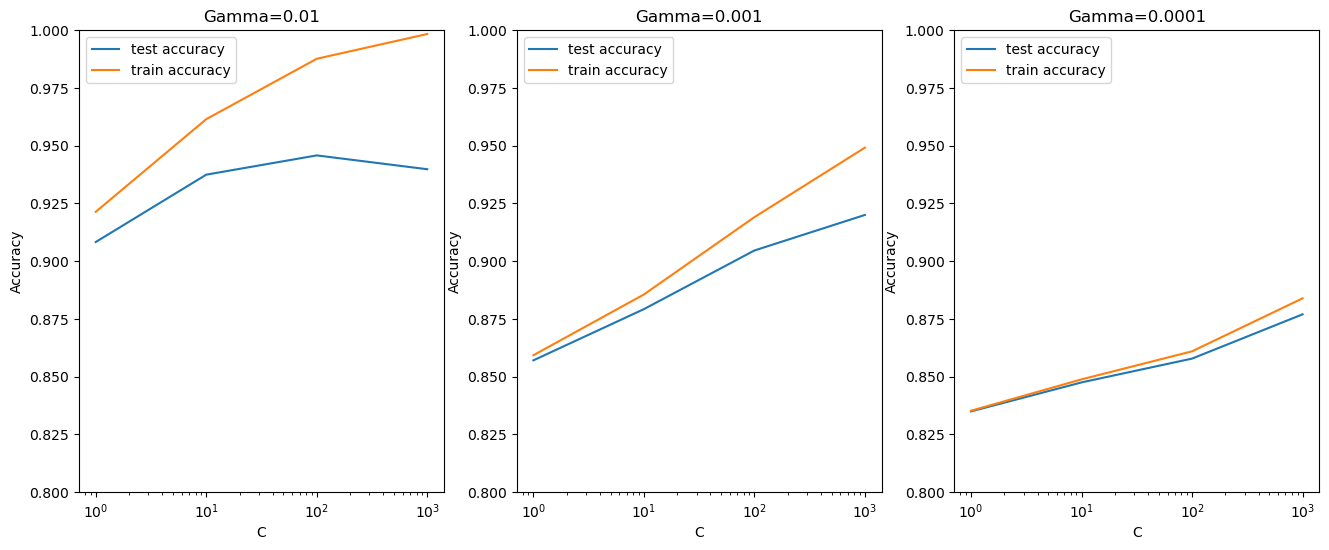

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [ ]:
# Printing the best score
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9457645878731279 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [ ]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

### predictions on the train set

In [ ]:
y_train_pred = svm_pca_model.predict(X_train_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[12252  2140]
 [ 1820 12699]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8630279132510117
Sensitivity:- 0.8746470142571803
Specificity:- 0.8513062812673707


### Predictions on the test set

In [ ]:
y_test_pred = svm_pca_model.predict(X_test_pca)

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4167  715]
 [ 582 4173]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8654145480958805
Sensitivity:- 0.877602523659306
Specificity:- 0.8535436296599754


In [ ]:
y_df_test_pred3 = svm_pca_model.predict(df_test_pca)

In [ ]:
final_prediction = pd.DataFrame({'id':churn_id,'churn_probability':y_df_test_pred3})

In [ ]:
final_prediction.to_csv('submission.csv',index=False)

### Xgboost with PCA

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE

In [ ]:
model = XGBClassifier()
model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred = model.predict(X_train_pca)

In [ ]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[14251   141]
 [   17 14502]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9945349520943586
Sensitivity:- 0.9988291204628418
Specificity:- 0.9902028904947193


In [ ]:
y_test_pred = model.predict(X_test_pca)

In [ ]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[14251   141]
 [   17 14502]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9462488326242606
Sensitivity:- 0.9988291204628418
Specificity:- 0.9902028904947193


In [ ]:
y_df_test_pred4 = model.predict(df_test_pca)

In [ ]:
final_prediction = pd.DataFrame({'id':churn_id,'churn_probability':y_df_test_pred4})

In [ ]:
final_prediction.to_csv('submission.csv',index=False)

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3],
             'subsample': [0.3,0.4,0.5]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'accuracy', # accuracy
                        cv = folds,
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

In [ ]:
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'subsample': [0.3, 0.4, 0.5]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# cv results
cv_results_xboost = pd.DataFrame(model_cv.cv_results_)
cv_results_xboost['param_learning_rate'] = cv_results_xboost['param_learning_rate'].astype('float')

In [ ]:
'We can get accuracy of **'+str(round(model_cv.best_score_,2))+'** using '+str(model_cv.best_params_)

"We can get accuracy of **0.88** using {'learning_rate': 0.3, 'subsample': 0.4}"

In [ ]:
# def plot_for_xboost(param_grid,cv_results):
#     plt.figure(figsize=(18,5))
#     for n, subsample in enumerate(param_grid['subsample']):
#         # subplot 1/n
#         plt.subplot(1,len(param_grid['subsample']), n+1)
#         df = cv_results[cv_results['param_subsample']==subsample]

#         plt.plot(df["param_learning_rate"], df["mean_test_score"])
#         plt.plot(df["param_learning_rate"], df["mean_train_score"])
#         plt.xlabel('learning_rate')
#         plt.ylabel('AUC')
#         plt.title("subsample={0}".format(subsample))
#         plt.ylim([0.60, 1])
#         plt.legend(['test score', 'train score'], loc='right left')
#         plt.xscale('log')

In [ ]:
# param_grid1 = {'learning_rate': [0.1,0.2,0.3], 'subsample': [0.3,0.4,0.5]}
# plot_for_xboost(param_grid1,cv_results_xboost)

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.3,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.5,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params,max_depth=2, n_estimators=200)
model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.5}, ...)

In [ ]:
y_test_pred = model.predict(X_test_pca)

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4235  647]
 [ 502 4253]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8807720244889489
Sensitivity:- 0.8944269190325973
Specificity:- 0.8674723473986071


In [ ]:
y_df_test_pred5 = model_cv.predict(df_test_pca)

In [ ]:
final_prediction = pd.DataFrame({'id':churn_id,'churn_probability':y_df_test_pred5})

In [ ]:
final_prediction.to_csv('submission.csv',index=False)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 2
